# Heart Failure Prediction 

# Perform Machine learning algorithms to predict Heart Disease

Predicting the heart disease whether Yes or No for the given input criteria is classification based. Hence, here we are using 4 classification related Machine learning algorithm such as Decision Tree, Random Forest, Logistic Regression and Naive Bayes.


In [1]:
# Importing libraries

import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

pd.set_option('display.width', 2000)
np.set_printoptions(linewidth=2000)
pd.set_option('display.max_columns', 25)

Dataset can be downloaded from following link:

https://www.kaggle.com/fedesoriano/heart-failure-prediction


Reading the dataset and creating dataframe


In [2]:
data = pd.read_csv("heart.csv")
# Displaying top 5 rows of dataset

data.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0



EDA has already been performed in the following link, Have a look! 

https://github.com/Muthumani117/EDA_Project1.git

Now performing ML algorithms to choose best algorithm depending on accuracy score


In [3]:
# Converting the object column into string

data['Sex'].replace({'M':1, 'F':0}, inplace=True)                # inplace=True will change in the dataframe itself
data['ExerciseAngina'].replace({'Y':1, 'N':0}, inplace=True)



Converting other categorical column datatypes into indicator varibales using get_dummies() function. 


In [4]:
df =pd.get_dummies(data, drop_first=True)    # drop_first= True is used to reduce any extra column created during dummy varibale creation
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   Sex                918 non-null    int64  
 2   RestingBP          918 non-null    int64  
 3   Cholesterol        918 non-null    int64  
 4   FastingBS          918 non-null    int64  
 5   MaxHR              918 non-null    int64  
 6   ExerciseAngina     918 non-null    int64  
 7   Oldpeak            918 non-null    float64
 8   HeartDisease       918 non-null    int64  
 9   ChestPainType_ATA  918 non-null    uint8  
 10  ChestPainType_NAP  918 non-null    uint8  
 11  ChestPainType_TA   918 non-null    uint8  
 12  RestingECG_Normal  918 non-null    uint8  
 13  RestingECG_ST      918 non-null    uint8  
 14  ST_Slope_Flat      918 non-null    uint8  
 15  ST_Slope_Up        918 non-null    uint8  
dtypes: float64(1), int64(8), u

In [5]:
print(df.head(2))

   Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  Oldpeak  HeartDisease  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  RestingECG_Normal  RestingECG_ST  ST_Slope_Flat  ST_Slope_Up
0   40    1        140          289          0    172               0      0.0             0                  1                  0                 0                  1              0              0            1
1   49    0        160          180          0    156               0      1.0             1                  0                  1                 0                  1              0              1            0


In [6]:

X = df.drop('HeartDisease', axis=1)
Y = df['HeartDisease']

# Scaling data

In [7]:
scale = StandardScaler()
scaled_df = scale.fit_transform(X)
scaled_data = pd.DataFrame(scaled_df, columns=X.columns)
scaled_X = scaled_data

# Splitting the dataset for training and testing

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y , test_size=0.3, random_state=42)
X_train.shape


(642, 15)

In [9]:
X_test.shape


(276, 15)

In [13]:
# Creating new general function to calculate accuracy score and plot confusion matrix for algorithm

def score_calculation(name, model,X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    score = accuracy_score(Y_test, predictions)
    print(f'Accuracy Score of {name} is ' + '{:.2f}'.format(score*100))
    mse = mean_squared_error(Y_test, predictions)
    rmse = sqrt(mse)
    print(f'RMSE Score of {name} is ' + '{:.2f}'.format(rmse*100))
    print("\nClassification Report \n")
    print(classification_report(Y_test, predictions))
    plot_confusion_matrix(model, X_test, Y_test)
    plt.grid(None)
    plt.title(f"Confusion matrix of {name} model")
    plt.show()
    

# Decision Tree Classifier algorithm

Accuracy Score of Decision Tree is 75.36
RMSE Score of Decision Tree is 49.64

Classification Report 

              precision    recall  f1-score   support

           0       0.66      0.80      0.73       112
           1       0.84      0.72      0.78       164

    accuracy                           0.75       276
   macro avg       0.75      0.76      0.75       276
weighted avg       0.77      0.75      0.76       276



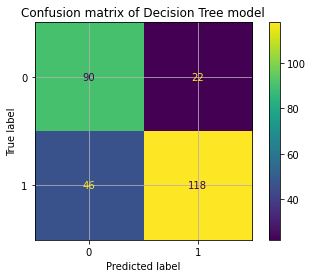

In [14]:

model_1 = DecisionTreeClassifier(criterion='entropy', random_state=42)
score_calculation("Decision Tree", model_1, X_train, X_test, Y_train, Y_test)


# Logistic Regression Algorithm

Accuracy Score of Logistic Regression is 88.04
RMSE Score of Logistic Regression is 34.58

Classification Report 

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       112
           1       0.92      0.88      0.90       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



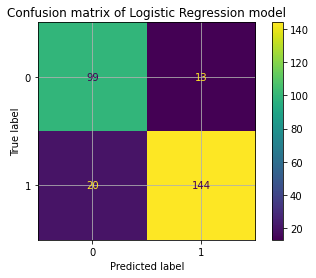

In [15]:

model_2 = LogisticRegression()
score_calculation("Logistic Regression", model_2, X_train, X_test, Y_train, Y_test)


# Random Classifier Algorithm

Accuracy Score of Random Forest Classifier is 87.68
RMSE Score of Random Forest Classifier is 35.10

Classification Report 

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       112
           1       0.90      0.90      0.90       164

    accuracy                           0.88       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.88      0.88      0.88       276



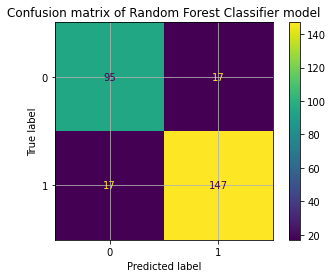

In [16]:

model_3 = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=453)
score_calculation("Random Forest Classifier", model_3, X_train, X_test, Y_train, Y_test)


# Naive Bayes Algorithm

When using this algorithm sometimes,we will get below error:

    "ValueError: Negative values in data passed to MultinomialNB"

To avoid this, we have to scale our data using MinMaxScaler


Accuracy Score of Naive Bayes is 84.06
RMSE Score of Naive Bayes is 39.93

Classification Report 

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       112
           1       0.88      0.84      0.86       164

    accuracy                           0.84       276
   macro avg       0.83      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



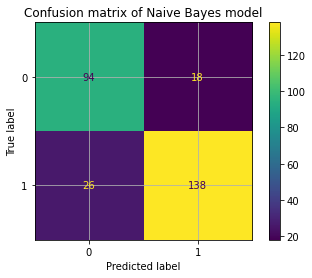

In [17]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


model_4 = MultinomialNB(alpha=1, fit_prior=True)
score_calculation("Naive Bayes", model_4, X_train, X_test, Y_train, Y_test)



Conclusion:

From the above 4 ML algorithms, it can concluded that 
    Logistic Regression algorithm gives maximum accuracy score of 88 % as well as F1 score from classification report is 90 % and it can be concluded as the best model.
    